<a href="https://colab.research.google.com/github/ZainaNamugabo/Image-Identification-Classifier/blob/main/Fashion_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_test.shape)
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 28, 28)


(60000, 28, 28)

In [4]:
cloth= X_train[7]
cloth

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  0,   0,   0,   0, 177, 239, 223, 254, 223, 232, 234, 234, 236,
        236, 235, 235, 235, 235, 235, 234, 231, 233, 222, 246,  88,   0,
          1,   0],
       [  0,   0,   0,   0, 234, 239, 229, 255, 220, 232, 233, 232, 234,
        235, 235, 235, 235, 235, 234, 233, 232, 230, 228, 254, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 225, 240, 226, 255, 221, 227, 232, 228, 231,
        230, 228, 229, 231, 230, 228, 228, 232, 223, 229, 244, 231,   0,
          0,   0],
       [  0,   0,   0,  47, 245, 231, 234, 249, 229, 221, 229, 225, 229,
        227, 226, 227, 228, 227, 228, 229, 228, 224, 246, 240, 227,   0,
          0,   0],
       [  0,   0,   0,  51, 248, 230, 245, 246, 230, 226, 230, 227, 230,
        229, 228, 229, 230, 228, 228, 231, 225, 227, 242, 237, 255,   0,
          0,   0],
       [  0,   0,   0, 101, 253, 229, 247, 241, 221, 233, 228, 227, 229,
        228, 227, 228, 230, 227, 230, 234, 225, 229, 251, 229, 243,  55,
          0,   0],
       [  0,   0,   0, 102, 255, 227, 242, 241, 221, 234, 223, 230, 228,
        231, 229, 231, 231, 227, 229, 241, 219, 236, 254, 225, 250, 167,
          0,   0],
       [  0,   0,   0,  90, 255, 229, 236, 231, 222, 236, 223, 231, 229,
        231, 229, 231, 231, 228, 224, 245, 218, 243, 239, 227, 244, 175,
          0,   0],
       [  0,   0,   0, 212, 250, 225, 236, 249, 229, 237, 223, 231, 229,
        231, 229, 231, 231, 230, 221, 243, 225, 248, 230, 236, 234, 255,
          1,   0],
       [  0,   0,   0, 245, 243, 232, 243, 218, 228, 238, 222, 231, 229,
        231, 229, 231, 231, 230, 222, 237, 237, 252, 229, 239, 240, 223,
          0,   0],
       [  0,   0,  27, 255, 235, 242, 237, 216, 230, 236, 224, 229, 227,
        233, 233, 233, 230, 228, 224, 230, 245, 247, 221, 243, 239, 252,
          0,   0],
       [  0,   0,  88, 255, 232, 248, 236, 208, 234, 231, 223, 227, 226,
        233, 232, 232, 230, 228, 224, 224, 235, 233, 234, 247, 235, 255,
          0,   0],
       [  0,   0,  83, 255, 225, 250, 237, 224, 236, 229, 225, 225, 227,
        235, 229, 231, 230, 230, 227, 221, 227, 221, 239, 250, 231, 255,
          0,   0],
       [  0,   0,  20, 255, 224, 248, 234, 226, 232, 222, 225, 224, 231,
        238, 226, 230, 228, 230, 230, 221, 229, 225, 244, 246, 230, 255,
          0,   0],
       [  0,   0,  95, 255, 218, 242, 255, 232, 226, 224, 229, 228, 228,
        232, 228, 229, 231, 233, 232, 226, 221, 224, 247, 244, 228, 255,
          0,   0],
       [  0,   0, 167, 255, 213, 235, 255,  81, 245, 251, 238, 236, 230,
        229, 230, 229, 230, 231, 238, 240, 255, 192, 255, 239, 228, 255,
         23,   0],
       [  0,   0, 173, 242, 224, 233, 255,   0, 136, 226, 239, 255, 229,
        236, 236, 234, 233, 228, 251, 248, 200,  81, 255, 237, 225, 255,
        101,   0],
       [  0,   0, 172, 255, 226, 233, 255,   0,   0,   0,   0,   0,   8,
         21,  22,  21,  20,  14,   0,   0,   0,   0, 255, 238, 229, 246,
        178,   0],
       [  0,   0,  16, 255, 236, 238, 25

In [5]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
model = Sequential()

model.add(Conv2D(filters= 8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7550 - loss: 0.7079 - val_accuracy: 0.8432 - val_loss: 0.4381
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8606 - loss: 0.3960 - val_accuracy: 0.8609 - val_loss: 0.3915
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8782 - loss: 0.3512 - val_accuracy: 0.8701 - val_loss: 0.3679
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8841 - loss: 0.3307 - val_accuracy: 0.8762 - val_loss: 0.3515
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8880 - loss: 0.3193 - val_accuracy: 0.8759 - val_loss: 0.3568
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8936 - loss: 0.3019 - val_accuracy: 0.8745 - val_loss: 0.3412
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8967 - loss: 0.2913 - val_accuracy: 0.8858 - val_loss: 0.3257
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9019 - loss

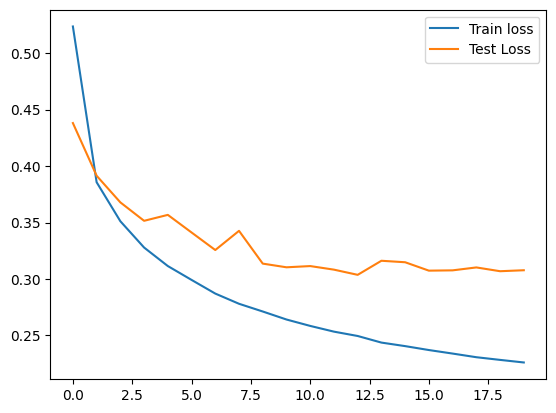

In [9]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=20)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

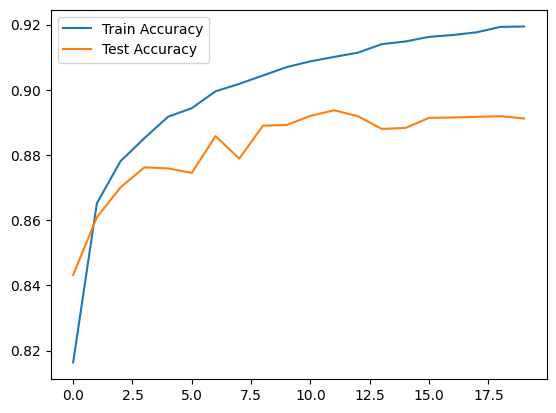

In [10]:
# Visualize the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8931 - loss: 0.3100


[0.3077452778816223, 0.8912000060081482]

In [12]:
model.save('cloth_classifier.keras')

#model testing

In [13]:
from tensorflow.keras.models import load_model

model = load_model("cloth_classifier.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


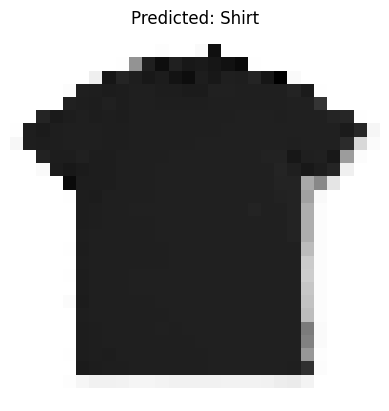

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

img_path = "/content/shirt.jpg"


img = load_img(img_path, target_size=(28, 28), color_mode="grayscale")
img_array = img_to_array(img) / 255.0
img_array = 1 - img_array
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


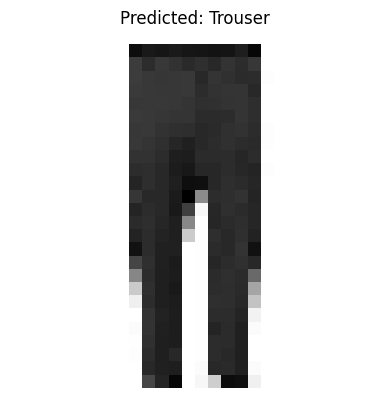

In [23]:
img_path2 = "/content/trouser.jpg"


img2 = load_img(img_path2, target_size=(28, 28), color_mode="grayscale")
img_array2 = img_to_array(img2) / 255.0
img_array2 = 1 - img_array2
img_array2 = np.expand_dims(img_array2, axis=0)

prediction = model.predict(img_array2)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img2, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


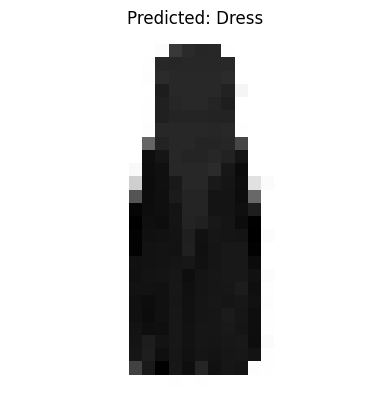

In [27]:
img_path3 = "/content/blkdress.jpg"


img3 = load_img(img_path3, target_size=(28, 28), color_mode="grayscale")
img_array3 = img_to_array(img3) / 255.0
img_array3 = 1 - img_array3
img_array3 = np.expand_dims(img_array3, axis=0)

predictions = model.predict(img_array3)
predicted_class = class_names[np.argmax(predictions)]

plt.imshow(img3, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()